## Task

Defining an "adopted user" as a user who has logged into the product on three separate days in at least one seven day period, identify which factors predict future user adoption.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

Read csv files

In [2]:
users=pd.read_csv('takehome_users.csv', encoding='latin-1', parse_dates=['creation_time'])

In [3]:
users.head()

,object_id,creation_time,name,email,creation_source,last_session_creation_time,opted_in_to_mailing_list,enabled_for_marketing_drip,org_id,invited_by_user_id
0,1,2014-04-22 03:53:30,Clausen August,AugustCClausen@yahoo.com,GUEST_INVITE,1.398139e+09,1,0,11,10803.0
1,2,2013-11-15 03:45:04,Poole Matthew,MatthewPoole@gustr.com,ORG_INVITE,1.396238e+09,0,0,1,316.0
2,3,2013-03-19 23:14:52,Bottrill Mitchell,MitchellBottrill@gustr.com,ORG_INVITE,1.363735e+09,0,0,94,1525.0
3,4,2013-05-21 08:09:28,Clausen Nicklas,NicklasSClausen@yahoo.com,GUEST_INVITE,1.369210e+09,0,0,1,5151.0
4,5,2013-01-17 10:14:20,Raw Grace,GraceRaw@yahoo.com,GUEST_INVITE,1.358850e+09,0,0,193,5240.0


In [74]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12000 entries, 0 to 11999
Data columns (total 10 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   object_id                   12000 non-null  int64         
 1   creation_time               12000 non-null  datetime64[ns]
 2   name                        12000 non-null  object        
 3   email                       12000 non-null  object        
 4   creation_source             12000 non-null  object        
 5   last_session_creation_time  8823 non-null   float64       
 6   opted_in_to_mailing_list    12000 non-null  int64         
 7   enabled_for_marketing_drip  12000 non-null  int64         
 8   org_id                      12000 non-null  int64         
 9   invited_by_user_id          6417 non-null   float64       
dtypes: datetime64[ns](1), float64(2), int64(4), object(3)
memory usage: 937.6+ KB


In [4]:
engagement=pd.read_csv('takehome_user_engagement.csv', parse_dates=['time_stamp'])

In [5]:
engagement.head()

,time_stamp,user_id,visited
0,2014-04-22 03:53:30,1,1
1,2013-11-15 03:45:04,2,1
2,2013-11-29 03:45:04,2,1
3,2013-12-09 03:45:04,2,1
4,2013-12-25 03:45:04,2,1


In [73]:
engagement.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 207917 entries, 0 to 207916
Data columns (total 5 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   time_stamp   207917 non-null  datetime64[ns]
 1   user_id      207917 non-null  int64         
 2   visited      207917 non-null  int64         
 3   day_of_week  207917 non-null  object        
 4   hour_of_day  207917 non-null  int64         
dtypes: datetime64[ns](1), int64(3), object(1)
memory usage: 7.9+ MB


Let's reorganize our engagement dataframe in order to obtain flag for users who are considered as adopted.

In [6]:
active=engagement.groupby('user_id')['visited'].count().reset_index()

In [7]:
active.sort_values(by='visited', ascending=False).head()

,user_id,visited
2652,3623,606
657,906,600
1315,1811,593
5548,7590,590
5877,8068,585


In [8]:
engagement.set_index('time_stamp', inplace=True)

In [9]:
# group the data by user_id and date, and count the number of visits on each date
daily_visits = engagement.groupby(['user_id', engagement.index.date])['visited'].count()

# check if any date has more than one visit for a given user
multi_login_dates = daily_visits[daily_visits > 1].index.get_level_values(1).unique()

if len(multi_login_dates) > 0:
    print("Some users logged in multiple times on the same day.")
else:
    print("No users logged in multiple times on the same day.")


No users logged in multiple times on the same day.


In [10]:

adopted=engagement.groupby('user_id')['visited'].rolling('7D').count().reset_index()
adopted[adopted['user_id']==60].sort_values(by='time_stamp')

,user_id,time_stamp,visited
740,60,2014-03-21 22:56:03,1.0
741,60,2014-03-29 22:56:03,1.0
742,60,2014-04-02 22:56:03,2.0
743,60,2014-04-05 22:56:03,2.0
744,60,2014-04-22 22:56:03,1.0
745,60,2014-04-28 22:56:03,2.0
746,60,2014-05-13 22:56:03,1.0
747,60,2014-05-15 22:56:03,2.0


In [11]:
# Find the first appearance of visited==3 for each user_id
first_3_visit = adopted[adopted['visited'] == 3].groupby('user_id')['time_stamp'].min().reset_index()

# Print the result
print(first_3_visit)

      user_id          time_stamp
0           2 2014-02-09 03:45:04
1          10 2013-02-19 22:08:03
2          20 2014-03-13 11:46:38
3          33 2014-03-23 06:29:09
4          42 2012-12-26 19:05:07
...       ...                 ...
1597    11965 2014-05-02 07:17:35
1598    11967 2014-03-10 08:12:37
1599    11969 2013-06-03 00:48:14
1600    11975 2013-05-29 11:10:11
1601    11988 2014-03-19 11:04:47

[1602 rows x 2 columns]


In [12]:
first_3_visit['adopted']=1

In [13]:
first_3_visit.columns

Index(['user_id', 'time_stamp', 'adopted'], dtype='object')

In [14]:
first_3_visit.tail()

,user_id,time_stamp,adopted
1597,11965,2014-05-02 07:17:35,1
1598,11967,2014-03-10 08:12:37,1
1599,11969,2013-06-03 00:48:14,1
1600,11975,2013-05-29 11:10:11,1
1601,11988,2014-03-19 11:04:47,1


In [15]:
engagement.reset_index(inplace=True)
# Group the data by user_id
grouped = engagement.groupby('user_id')

# Create a dictionary to hold the calculated values for each user
data = {'user_id': [], 'min_time_stamp': [], 'max_time_stamp': [], 'num_logins': [], 'num_logins_30d': []}

# Loop over each group and calculate the required values
for user_id, group in grouped:
    data['user_id'].append(user_id)
    data['min_time_stamp'].append(group['time_stamp'].min())
    data['max_time_stamp'].append(group['time_stamp'].max())
    data['num_logins'].append(len(group))

    # Calculate the number of logins during the first 30 days since min time_stamp
    first_30_days = (group['time_stamp'] >= group['time_stamp'].min()) & (group['time_stamp'] <= group['time_stamp'].min() + pd.Timedelta('30D'))
    data['num_logins_30d'].append(len(group[first_30_days]))

# Create the user_activity dataframe
user_activity = pd.DataFrame(data)

In [16]:
grouped

In [17]:
user_activity.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8823 entries, 0 to 8822
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   user_id         8823 non-null   int64         
 1   min_time_stamp  8823 non-null   datetime64[ns]
 2   max_time_stamp  8823 non-null   datetime64[ns]
 3   num_logins      8823 non-null   int64         
 4   num_logins_30d  8823 non-null   int64         
dtypes: datetime64[ns](2), int64(3)
memory usage: 344.8 KB


In [18]:
full_activity=pd.merge(user_activity, first_3_visit, on='user_id', how='left')
full_activity.head()

,user_id,min_time_stamp,max_time_stamp,num_logins,num_logins_30d,time_stamp,adopted
0,1,2014-04-22 03:53:30,2014-04-22 03:53:30,1,1,NaT,NaN
1,2,2013-11-15 03:45:04,2014-03-31 03:45:04,14,3,2014-02-09 03:45:04,1.0
2,3,2013-03-19 23:14:52,2013-03-19 23:14:52,1,1,NaT,NaN
3,4,2013-05-22 08:09:28,2013-05-22 08:09:28,1,1,NaT,NaN
4,5,2013-01-22 10:14:20,2013-01-22 10:14:20,1,1,NaT,NaN


In [19]:
full_activity.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8823 entries, 0 to 8822
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   user_id         8823 non-null   int64         
 1   min_time_stamp  8823 non-null   datetime64[ns]
 2   max_time_stamp  8823 non-null   datetime64[ns]
 3   num_logins      8823 non-null   int64         
 4   num_logins_30d  8823 non-null   int64         
 5   time_stamp      1602 non-null   datetime64[ns]
 6   adopted         1602 non-null   float64       
dtypes: datetime64[ns](3), float64(1), int64(3)
memory usage: 551.4 KB


In [20]:
m_df=pd.merge(users, full_activity, left_on='object_id', right_on='user_id', how='left')
m_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 0 to 11999
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   object_id                   12000 non-null  int64         
 1   creation_time               12000 non-null  datetime64[ns]
 2   name                        12000 non-null  object        
 3   email                       12000 non-null  object        
 4   creation_source             12000 non-null  object        
 5   last_session_creation_time  8823 non-null   float64       
 6   opted_in_to_mailing_list    12000 non-null  int64         
 7   enabled_for_marketing_drip  12000 non-null  int64         
 8   org_id                      12000 non-null  int64         
 9   invited_by_user_id          6417 non-null   float64       
 10  user_id                     8823 non-null   float64       
 11  min_time_stamp              8823 non-null   datetime64

In [22]:
m_df['days_to_login'] = m_df.apply(lambda x: (x['min_time_stamp'].date()-x['creation_time'].date()).days if pd.notna(x['min_time_stamp']) else np.nan, axis=1)


In [23]:
print('Number of users who never logged in the system:',m_df['days_to_login'].isna().sum())

Number of users who never logged in the system: 3177


In [24]:
m_df[['adopted', 'num_logins', 'num_logins_30d']]=m_df[['adopted', 'num_logins', 'num_logins_30d']].fillna(0)

In [25]:
m_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12000 entries, 0 to 11999
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   object_id                   12000 non-null  int64         
 1   creation_time               12000 non-null  datetime64[ns]
 2   name                        12000 non-null  object        
 3   email                       12000 non-null  object        
 4   creation_source             12000 non-null  object        
 5   last_session_creation_time  8823 non-null   float64       
 6   opted_in_to_mailing_list    12000 non-null  int64         
 7   enabled_for_marketing_drip  12000 non-null  int64         
 8   org_id                      12000 non-null  int64         
 9   invited_by_user_id          6417 non-null   float64       
 10  user_id                     8823 non-null   float64       
 11  min_time_stamp              8823 non-null   datetime64

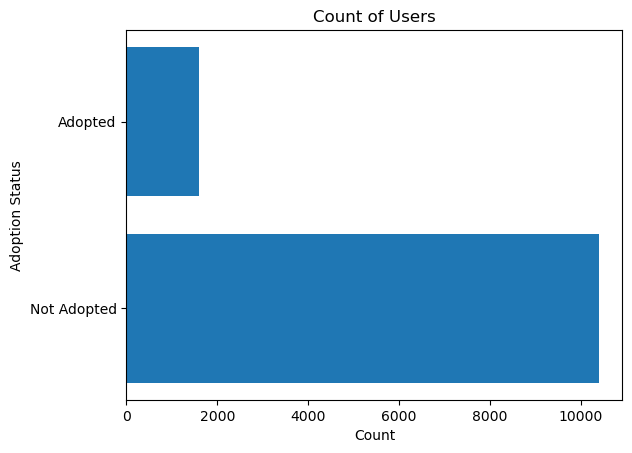

In [95]:
adopted_counts = m_df['adopted'].value_counts()
plt.barh(['Not Adopted', 'Adopted'], adopted_counts.values)
plt.xlabel('Count')
plt.ylabel('Adoption Status')
plt.title('Count of Users')
plt.show()

### Time series

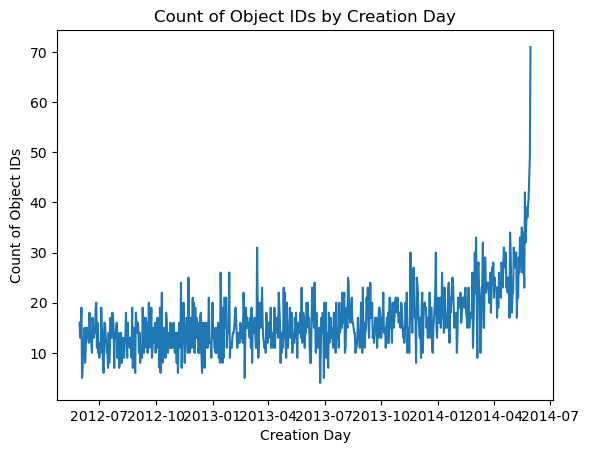

In [27]:
# create a new column with only date information
m_df['creation_day'] = m_df['creation_time'].dt.date

# plot count of object_ids by creation_day
m_df.groupby('creation_day')['object_id'].count().plot()
plt.xlabel('Creation Day')
plt.ylabel('Count of Object IDs')
plt.title('Count of Object IDs by Creation Day')
plt.show()

We can see that number of subscriptions grows over time with some seasonality.

Let's regroud data bu month and year of creation

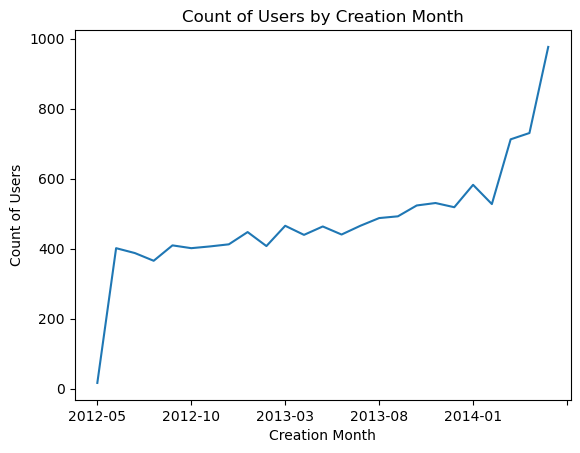

In [93]:
# create a new column with only month and year information
m_df['creation_m'] = m_df['creation_time'].dt.strftime('%Y-%m')

# plot count of object_ids by creation_day
m_df.groupby('creation_m')['object_id'].count().plot()
plt.xlabel('Creation Month')
plt.ylabel('Count of Users')
plt.title('Count of Users by Creation Month')
plt.show()

We can see steady growth of subscriptions from June 2012 to Feb 2014 and there was rapid growth from Mar 2014 to May 2014

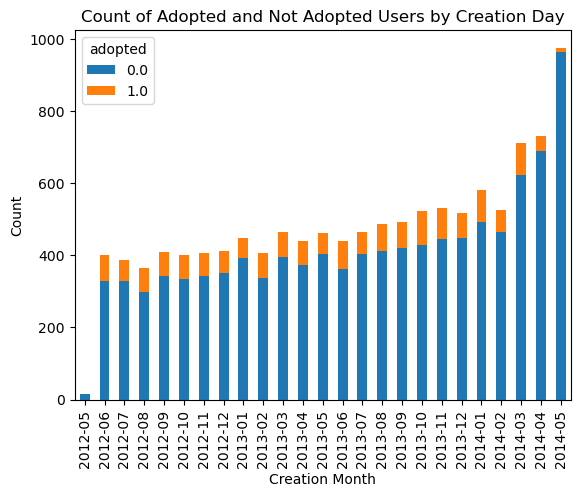

In [29]:
# Create a new dataframe with the count of adopted and not adopted users by creation_day
adopted_counts = m_df.groupby(['creation_m', 'adopted'])['object_id'].count().unstack()

# Plot the counts using a bar chart
adopted_counts.plot(kind='bar', stacked=True)

# Add title and axis labels
plt.title('Count of Adopted and Not Adopted Users by Creation Day')
plt.xlabel('Creation Month')
plt.ylabel('Count')

# Show the plot
plt.show()

As we can see some months of account creation have slightly higher adoption rates than other. We can make separate columns for month and year and then use them for modelling.

### Users behaviour

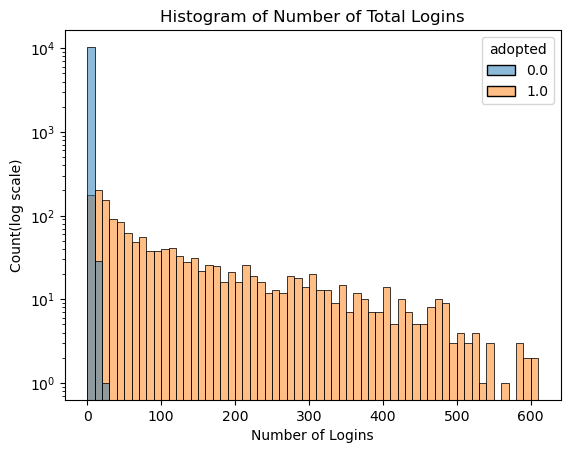

In [30]:
bin_edges = range(0, int(m_df['num_logins'].max()) + 10, 10)
sns.histplot(data=m_df, x='num_logins', hue='adopted', bins=bin_edges, alpha=0.5, log_scale=(False, True))

# Add title and axis labels
plt.title('Histogram of Number of Total Logins')

plt.xlabel('Number of Logins')
plt.ylabel('Count(log scale)')

# Show the plot
plt.show()

In [31]:
print('Number of people made login to the system more than 1 time ', m_df[m_df['num_logins']>1]['object_id'].count(), 'out of', m_df['object_id'].count(),'total number of users')

Number of people made login to the system more than 1 time  2588 out of 12000 total number of users


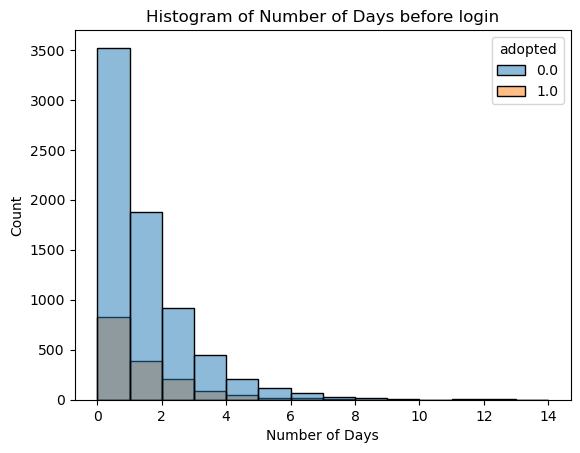

In [94]:
bin_edges = range(0, int(m_df['days_to_login'].max()) + 1, 1)
sns.histplot(data=m_df, x='days_to_login', hue='adopted', bins=bin_edges, alpha=0.5, log_scale=(False, False))

# Add title and axis labels
plt.title('Histogram of Number of Days before login')

plt.xlabel('Number of Days')
plt.ylabel('Count')

# Show the plot
plt.show()

In [33]:
print('Number of people made login to the system during first 3 days ', m_df[m_df['days_to_login']<=2]['object_id'].count(), 'out of', m_df['object_id'].count(),'total number of users')

Number of people made login to the system during first 3 days  7744 out of 12000 total number of users


In [34]:
print('And there were', m_df[(m_df['days_to_login']<=2)&(m_df['adopted']==1)]['object_id'].count(), 'users considered adopted out of', m_df[m_df['adopted']==1]['object_id'].count(),'total number of adopted users')

And there were 1420 users considered adopted out of 1602 total number of adopted users


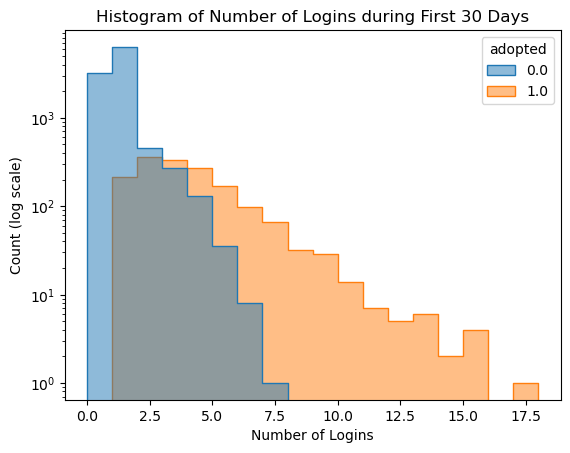

In [35]:
bin_edges = range(0, int(m_df['num_logins_30d'].max()) + 2, 1)
sns.histplot(data=m_df, x='num_logins_30d', hue='adopted', bins=bin_edges, element='step', alpha=0.5, log_scale=(False, True))

# Add title and axis labels
plt.title('Histogram of Number of Logins during First 30 Days')

plt.xlabel('Number of Logins')
plt.ylabel('Count (log scale)')

# Show the plot
plt.show()

In [36]:
print('Number of people made login to the system more than 1 time ', m_df[m_df['num_logins_30d']>1]['object_id'].count(), 'out of', m_df['object_id'].count(),'total number of users')

Number of people made login to the system more than 1 time  2285 out of 12000 total number of users


In [80]:
print('Users made in average', round(m_df[m_df['adopted']==1]['num_logins_30d'].mean(), 2),'logins during first 30 days among those who adopted system and only ',round(m_df[m_df['adopted']==0]['num_logins_30d'].mean(), 2), 'logins for those who didn’t adopted.')

Users made in average 3.66 logins during first 30 days among those who adopted system and only  0.85 logins for those who didn’t adopted.


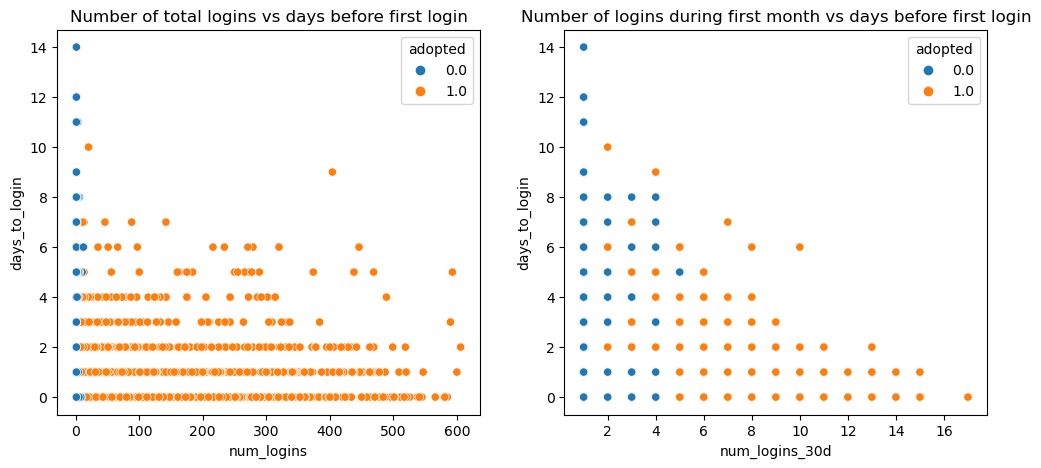

In [37]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
sns.scatterplot(data=m_df, x='num_logins', y='days_to_login', hue='adopted', ax=ax1)
sns.scatterplot(data=m_df, x='num_logins_30d', y='days_to_login', hue='adopted', ax=ax2)
ax1.set_title('Number of total logins vs days before first login')
ax2.set_title('Number of logins during first month vs days before first login')
plt.show();

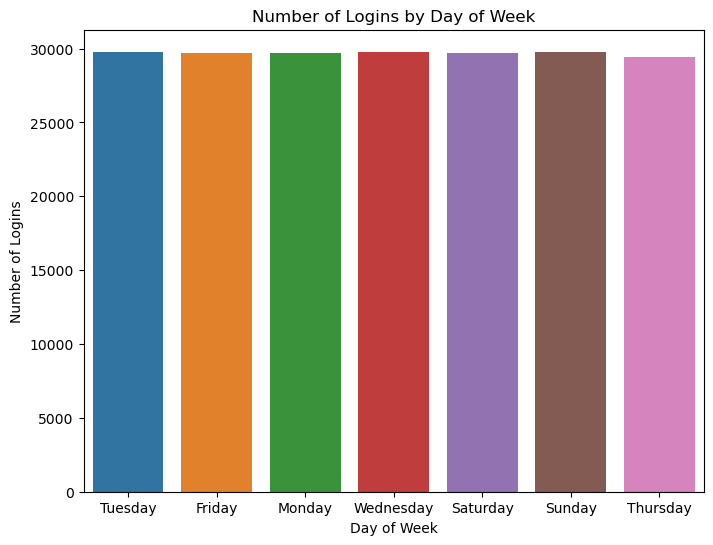

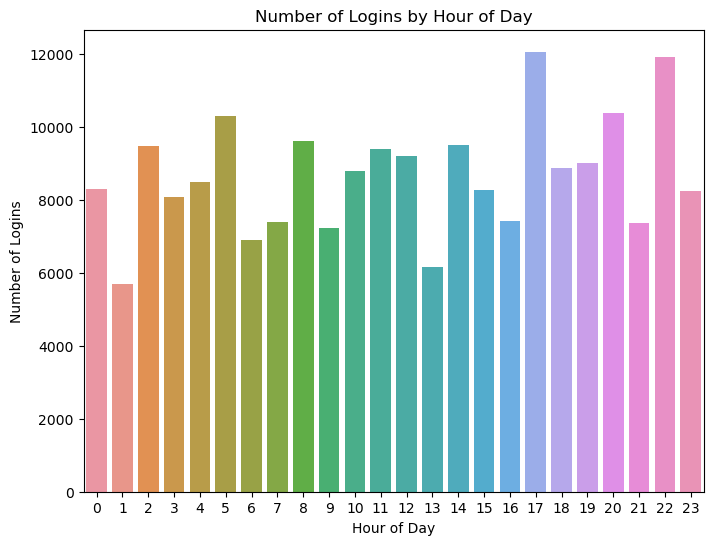

In [38]:
df2=engagement
df2['day_of_week'] = df2['time_stamp'].dt.day_name()

# Create a new column for the hour of day
df2['hour_of_day'] = df2['time_stamp'].dt.hour

# Plot the number of logins by day of week
plt.figure(figsize=(8,6))
sns.countplot(x='day_of_week', data=df2)
plt.title('Number of Logins by Day of Week')
plt.xlabel('Day of Week')
plt.ylabel('Number of Logins')
plt.show()

# Plot the number of logins by hour of day
plt.figure(figsize=(8,6))
sns.countplot(x='hour_of_day', data=df2)
plt.title('Number of Logins by Hour of Day')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Logins')
plt.show()


There is no clear pattern for day of the week and hour of login

In [39]:
m_df['last_session_creation_time'] = pd.to_datetime(m_df['last_session_creation_time'], unit='s')
# calculate user history, defined as number of days between account creation and last use
m_df['account_age'] = m_df['last_session_creation_time'] - m_df['creation_time']
m_df['account_age'] = m_df['account_age'].dt.days
m_df['account_age']=m_df['account_age'].fillna(0)

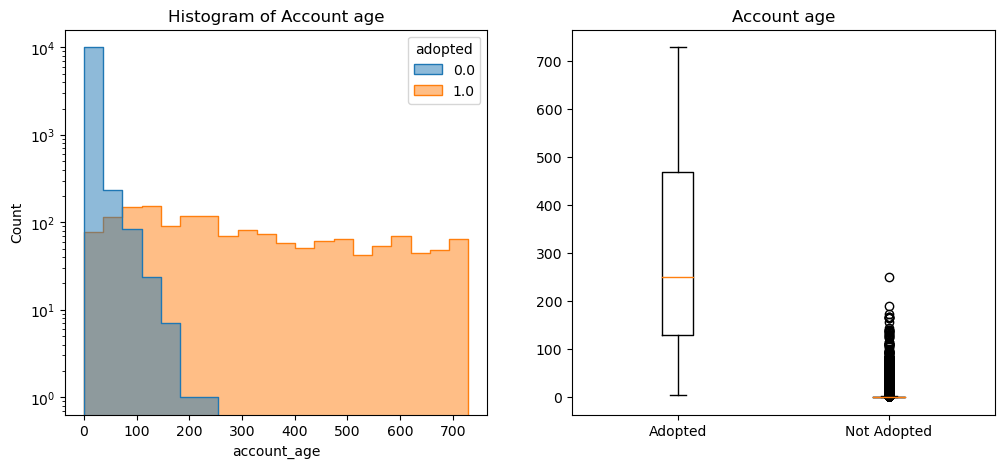

In [40]:
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(data=m_df, x='account_age', hue='adopted', bins=20, element='step', alpha=0.5, log_scale=(False, True), ax=ax1)

# Add title and axis labels
ax1.set_title('Histogram of Account age')

ax2.boxplot([m_df[m_df['adopted'] == 1]['account_age'], m_df[m_df['adopted'] == 0]['account_age']], labels=['Adopted', 'Not Adopted'])
ax2.set_title('Account age')

# Show the plot
plt.show()

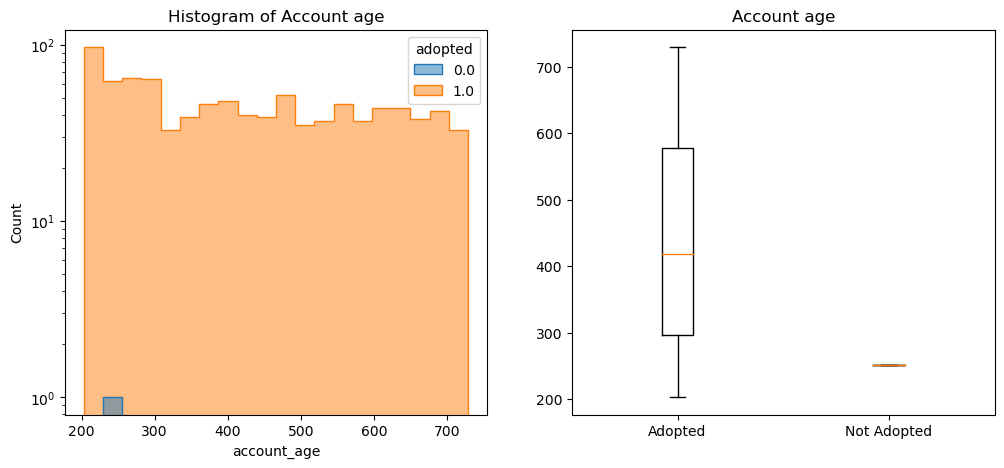

In [41]:
#Check users with account age>200 days
age_200=m_df[m_df['account_age']>=200]
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))
sns.histplot(data=age_200, x='account_age', hue='adopted', bins=20, element='step', alpha=0.5, log_scale=(False, True), ax=ax1)

# Add title and axis labels
ax1.set_title('Histogram of Account age')

ax2.boxplot([age_200[age_200['adopted'] == 1]['account_age'], age_200[age_200['adopted'] == 0]['account_age']], labels=['Adopted', 'Not Adopted'])
ax2.set_title('Account age')

# Show the plot
plt.show()

In [42]:
print(age_200[age_200['adopted'] == 1]['account_age'].count(), age_200[age_200['adopted'] == 0]['account_age'].count())

941 1


Out of 1602 adopted accounts 941 has account age more than 200 days.

### Categorical features

Check factors influencing adoption

In [85]:
def plot_cat(col):
    fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(12, 6))

    # plot the adoption rates by col
    sns.countplot(x=col, hue='adopted', data=m_df, ax=ax1)
    ax1.set_title('Adoption Rates by '+col)

    # plot the adoption rates by col
    adopted_pct = m_df.groupby(col)['adopted'].value_counts(normalize=True) * 100
    adopted_pct = adopted_pct.rename('percentage').reset_index()
    sns.barplot(x=col, y='percentage', hue='adopted', data=adopted_pct, ax=ax2)
    ax2.set_title('Adoption Rates by ' +col)
    #ax2.set_yscale('log')

    ax1.tick_params(axis='x', rotation=45)
    ax2.tick_params(axis='x', rotation=45)
    plt.show()
    print(adopted_pct)

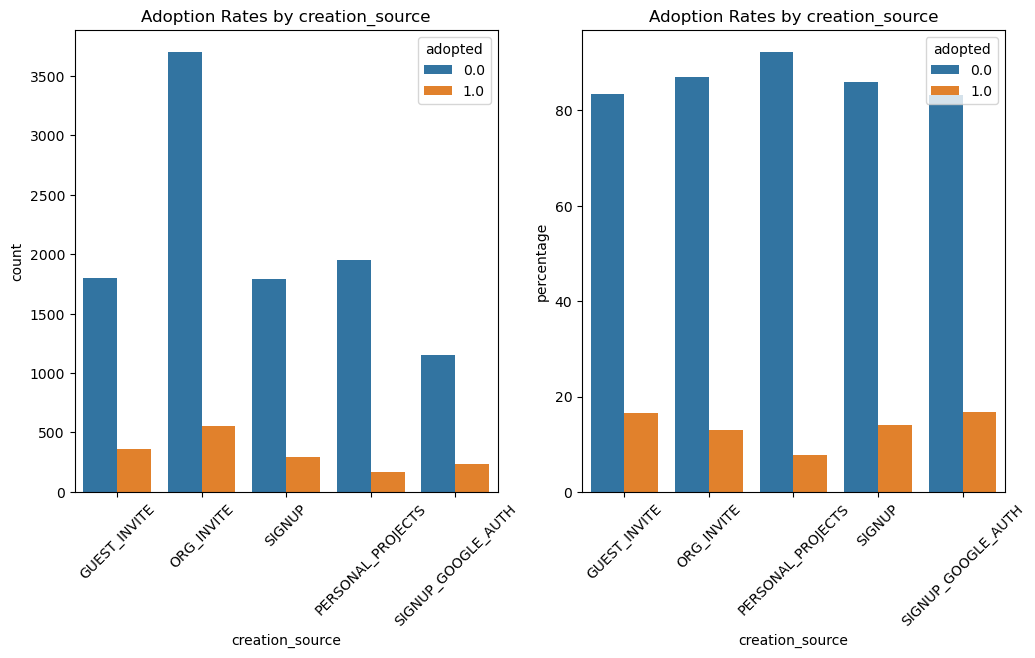

      creation_source  adopted  percentage
0        GUEST_INVITE      0.0   83.356449
1        GUEST_INVITE      1.0   16.643551
2          ORG_INVITE      0.0   87.000470
3          ORG_INVITE      1.0   12.999530
4   PERSONAL_PROJECTS      0.0   92.231170
5   PERSONAL_PROJECTS      1.0    7.768830
6              SIGNUP      0.0   85.960709
7              SIGNUP      1.0   14.039291
8  SIGNUP_GOOGLE_AUTH      0.0   83.249097
9  SIGNUP_GOOGLE_AUTH      1.0   16.750903


In [86]:
plot_cat('creation_source')

Most of the users created accounts through organization invites, but the most adopted are from guest invites and signups through google authentification by percentage of adopted users in these categories.

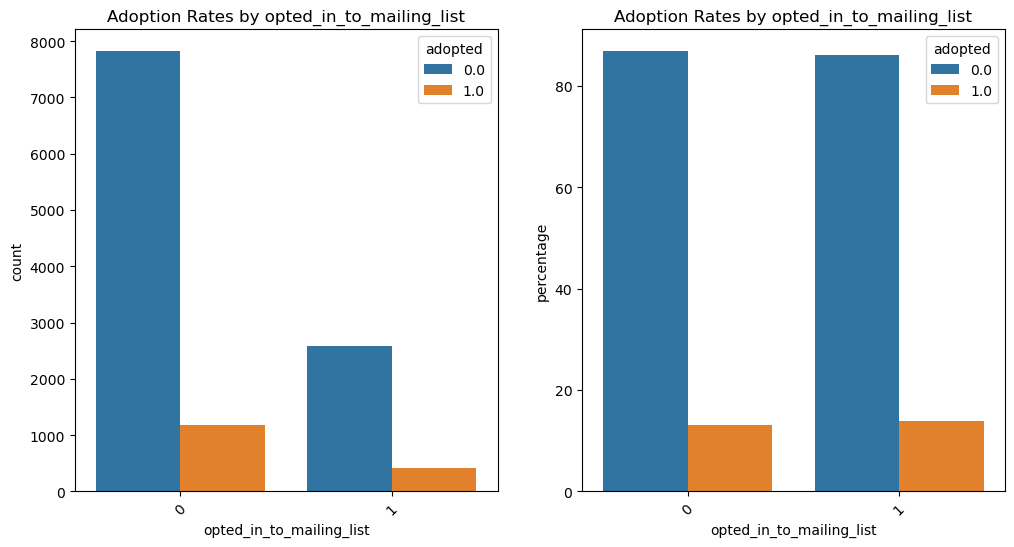

   opted_in_to_mailing_list  adopted  percentage
0                         0      0.0   86.808794
1                         0      1.0   13.191206
2                         1      0.0   86.172345
3                         1      1.0   13.827655


In [45]:
plot_cat('opted_in_to_mailing_list')

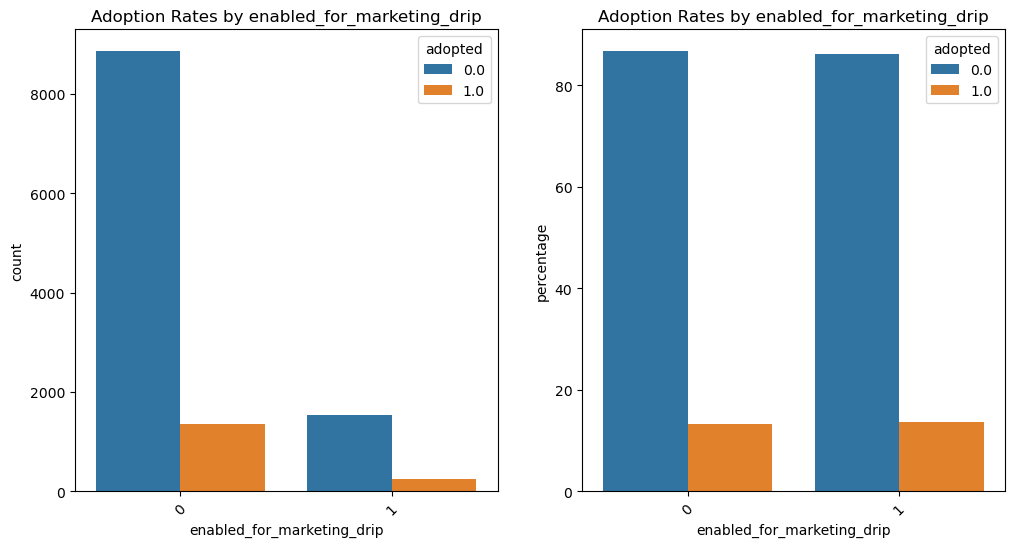

   enabled_for_marketing_drip  adopted  percentage
0                           0      0.0   86.716301
1                           0      1.0   13.283699
2                           1      0.0   86.272321
3                           1      1.0   13.727679


In [46]:
plot_cat('enabled_for_marketing_drip')

Most of users opted out from email list and marketing drip, and there is no difference in percentage of adopted users for these features.

Let's create field 'invited' where 1 - if there was user invite and 0 in other cases

In [47]:
m_df['invited'] = m_df['invited_by_user_id'].notna().astype(int)

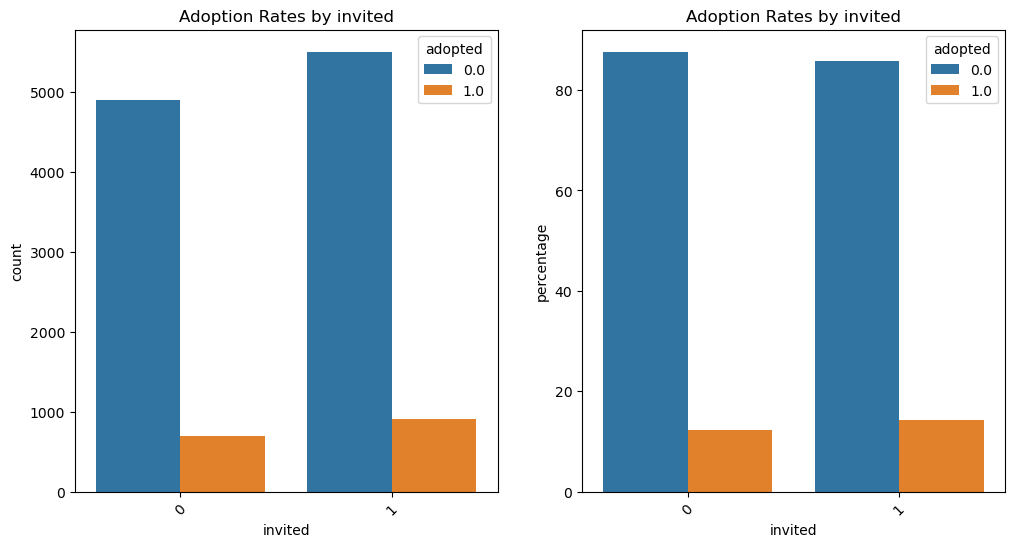

   invited  adopted  percentage
0        0      0.0   87.658965
1        0      1.0   12.341035
2        1      0.0   85.772168
3        1      1.0   14.227832


In [48]:
plot_cat('invited')

More than half of users got invites and adoption rate in that group is slightly higher than to those who didn't have user invite.

In [49]:
user_counts_by_org = m_df.groupby('org_id')['object_id'].count()
user_counts_by_org.describe()

count    417.000000
mean      28.776978
std       27.560173
min        2.000000
25%       17.000000
50%       22.000000
75%       29.000000
max      319.000000
Name: object_id, dtype: float64

Let's set the field org_size. We could use quartiles to define the boundaries of the different sizes. For example, organizations with less than or equal to 17 users could be classified as "small", organizations with more than 17 and less than or equal to 30 users could be classified as "medium", and organizations with more than 30 users could be classified as "large".

In [50]:
# Calculate org sizes
user_counts_by_org = m_df.groupby('org_id')['object_id'].count()
org_sizes = pd.cut(user_counts_by_org, bins=[0, 17, 30, np.inf], labels=['small', 'medium', 'large'])
org_sizes = org_sizes.reset_index()
org_sizes.columns = ['org_id', 'org_size']

# Merge org sizes back to main dataframe
m_df = pd.merge(m_df, org_sizes, on='org_id', how='left')

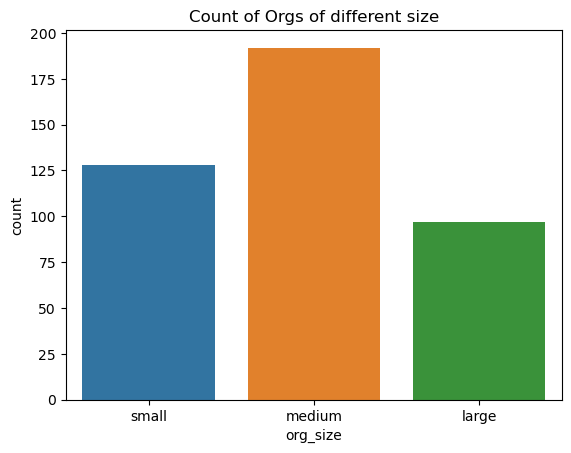

In [51]:
sns.countplot(x='org_size', data=org_sizes)
plt.title('Count of Orgs of different size')
plt.show()

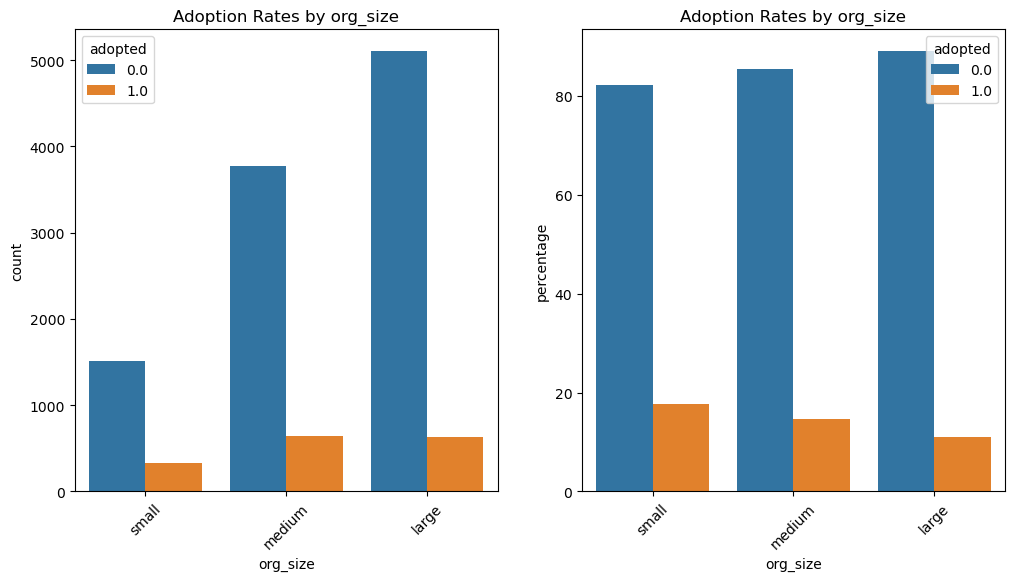

  org_size  adopted  percentage
0    small      0.0   82.257189
1    small      1.0   17.742811
2   medium      0.0   85.401130
3   medium      1.0   14.598870
4    large      0.0   89.026518
5    large      1.0   10.973482


In [52]:
plot_cat('org_size')

Most of users belong to large organizations, but adoption rate is higher for small size organizations with number of users less than 17

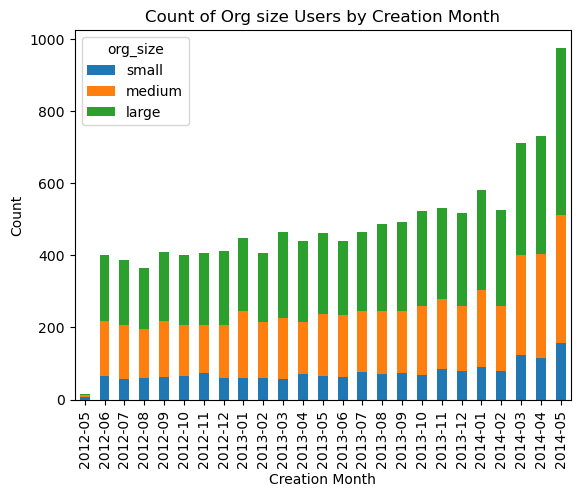

In [53]:
# Create a new dataframe with the count of adopted and not adopted users by creation_day
org_counts = m_df.groupby(['creation_m', 'org_size'])['object_id'].count().unstack()

# Plot the counts using a bar chart
org_counts.plot(kind='bar', stacked=True)

# Add title and axis labels
plt.title('Count of Org size Users by Creation Month')
plt.xlabel('Creation Month')
plt.ylabel('Count')

# Show the plot
plt.show()

### Data preprocessing

In [54]:
m_df.columns

Index(['object_id', 'creation_time', 'name', 'email', 'creation_source',
       'last_session_creation_time', 'opted_in_to_mailing_list',
       'enabled_for_marketing_drip', 'org_id', 'invited_by_user_id', 'user_id',
       'min_time_stamp', 'max_time_stamp', 'num_logins', 'num_logins_30d',
       'time_stamp', 'adopted', 'days_to_login', 'creation_day', 'creation_m',
       'account_age', 'invited', 'org_size'],
      dtype='object')

Remove all users who never logged in the system

In [55]:
m2_df=m_df[m_df['days_to_login'].notna()]
m2_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8823 entries, 0 to 11999
Data columns (total 23 columns):
 #   Column                      Non-Null Count  Dtype         
---  ------                      --------------  -----         
 0   object_id                   8823 non-null   int64         
 1   creation_time               8823 non-null   datetime64[ns]
 2   name                        8823 non-null   object        
 3   email                       8823 non-null   object        
 4   creation_source             8823 non-null   object        
 5   last_session_creation_time  8823 non-null   datetime64[ns]
 6   opted_in_to_mailing_list    8823 non-null   int64         
 7   enabled_for_marketing_drip  8823 non-null   int64         
 8   org_id                      8823 non-null   int64         
 9   invited_by_user_id          4776 non-null   float64       
 10  user_id                     8823 non-null   float64       
 11  min_time_stamp              8823 non-null   datetime64[

In [56]:
cleaned_df=m2_df[['creation_source', 'opted_in_to_mailing_list',
       'enabled_for_marketing_drip', 'adopted', 'org_size', 'invited', 'account_age', 'num_logins', 'num_logins_30d', 'days_to_login' ]]

In [57]:
#cleaned_df=pd.get_dummies(cleaned_df, columns = ['creation_source','creation_m', 'org_size'])
cleaned_df=pd.get_dummies(cleaned_df, columns = ['creation_source', 'org_size'])
cleaned_df.head()

,opted_in_to_mailing_list,enabled_for_marketing_drip,adopted,invited,account_age,num_logins,num_logins_30d,days_to_login,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH,org_size_small,org_size_medium,org_size_large
0,1,0,0.0,1,0.0,1.0,1.0,0.0,1,0,0,0,0,0,0,1
1,0,0,1.0,1,136.0,14.0,3.0,0.0,0,1,0,0,0,0,0,1
2,0,0,0.0,1,0.0,1.0,1.0,0.0,0,1,0,0,0,0,0,1
3,0,0,0.0,1,1.0,1.0,1.0,1.0,1,0,0,0,0,0,0,1
4,0,0,0.0,1,5.0,1.0,1.0,5.0,1,0,0,0,0,1,0,0


In [58]:
cleaned_df.columns

Index(['opted_in_to_mailing_list', 'enabled_for_marketing_drip', 'adopted',
       'invited', 'account_age', 'num_logins', 'num_logins_30d',
       'days_to_login', 'creation_source_GUEST_INVITE',
       'creation_source_ORG_INVITE', 'creation_source_PERSONAL_PROJECTS',
       'creation_source_SIGNUP', 'creation_source_SIGNUP_GOOGLE_AUTH',
       'org_size_small', 'org_size_medium', 'org_size_large'],
      dtype='object')

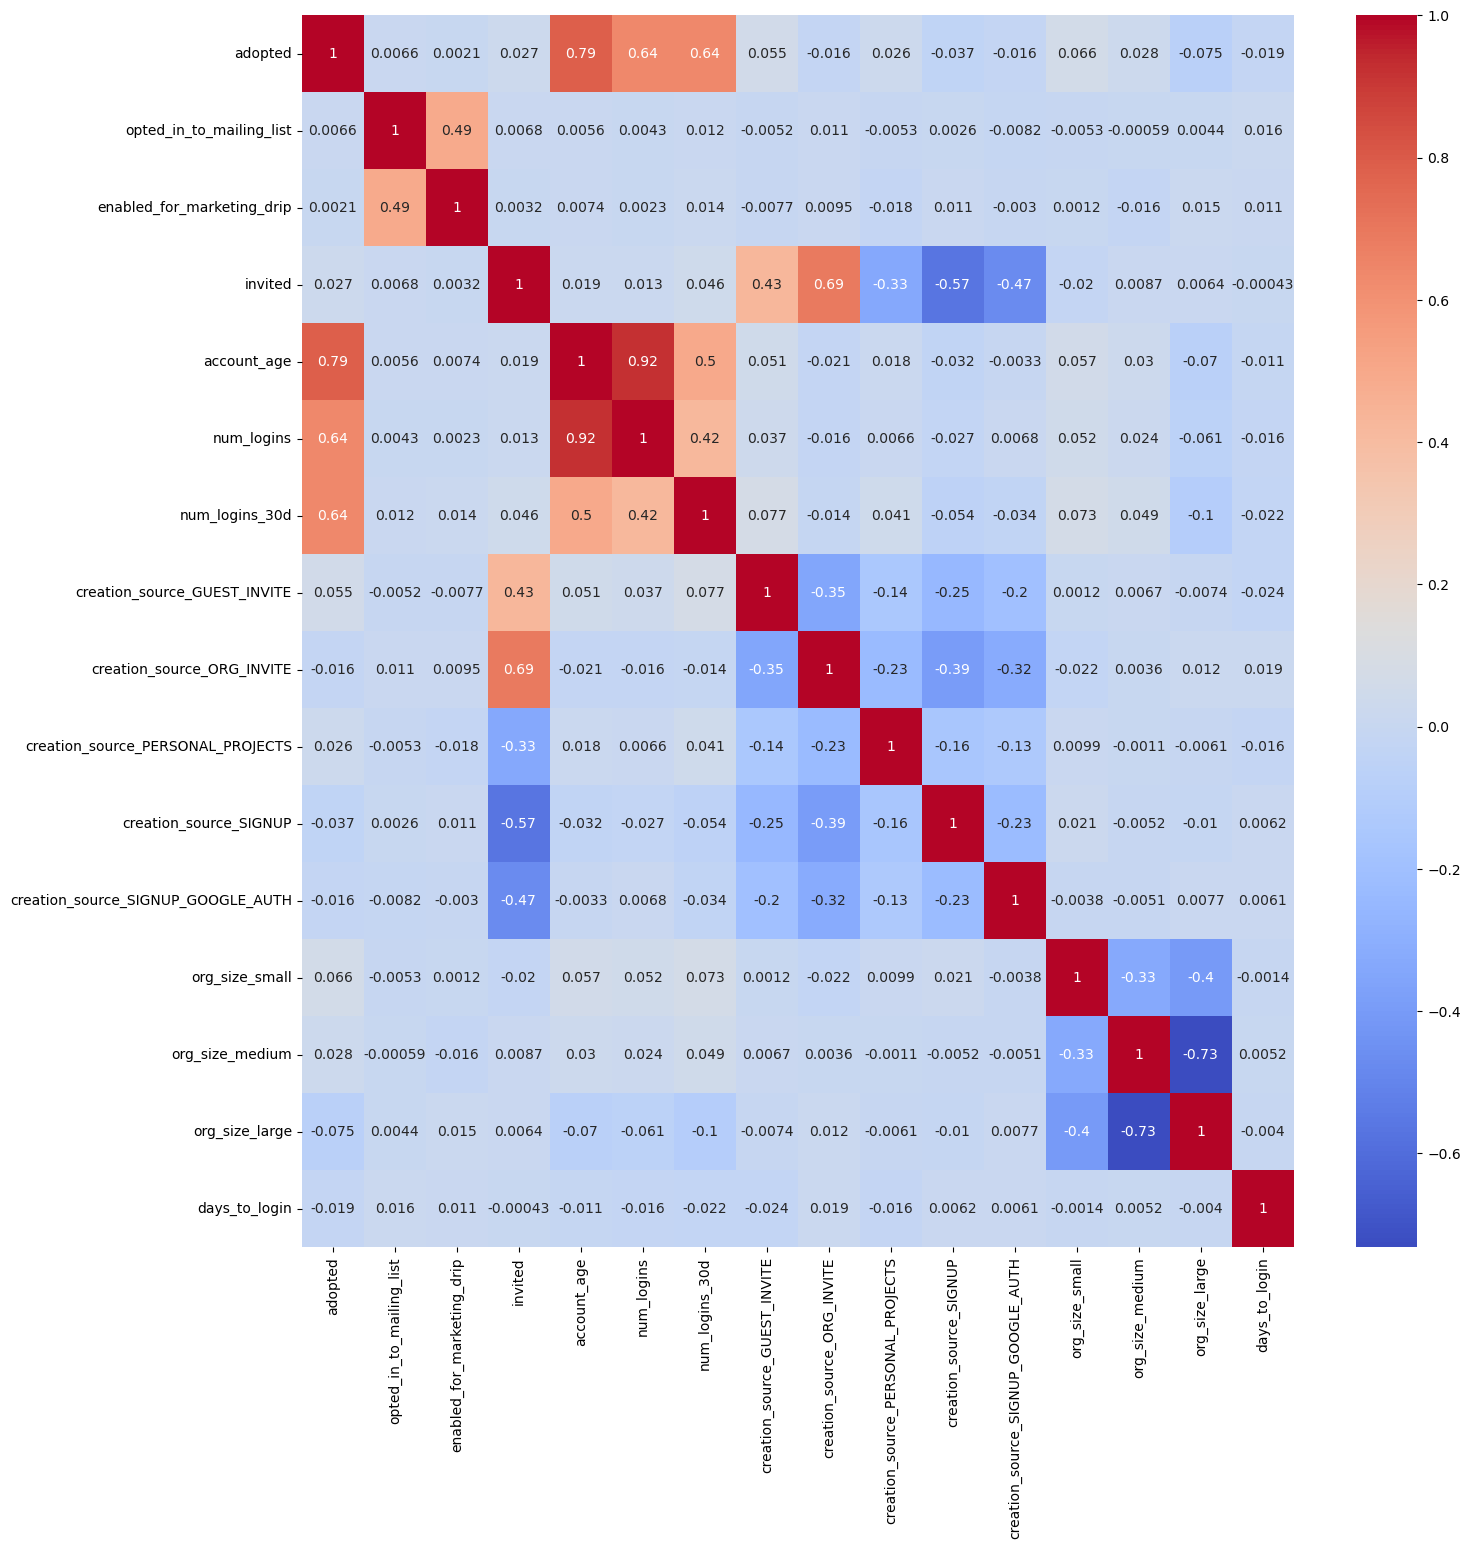

In [59]:
corr_matrix = cleaned_df[['adopted', 'opted_in_to_mailing_list', 'enabled_for_marketing_drip', 
       'invited', 'account_age', 'num_logins', 'num_logins_30d',
       'creation_source_GUEST_INVITE', 'creation_source_ORG_INVITE',
       'creation_source_PERSONAL_PROJECTS', 'creation_source_SIGNUP',
       'creation_source_SIGNUP_GOOGLE_AUTH', 'org_size_small', 'org_size_medium', 'org_size_large', 'days_to_login']].corr()

# Create the heatmap
plt.figure(figsize=(16,16))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True);

As we can see account age and number of logins are highly correlated, we nee to create another field for logins per day and drop those two features.

In [60]:
cleaned_df['logins_per_day'] = cleaned_df['num_logins'] / cleaned_df['account_age'].apply(lambda x: x if x!=0 else np.nan)

In [61]:
cleaned_df['logins_per_day'].fillna(0, inplace=True)
cleaned_df['logins_per_day'].head()

0    0.000000
1    0.102941
2    0.000000
3    1.000000
4    0.200000
Name: logins_per_day, dtype: float64

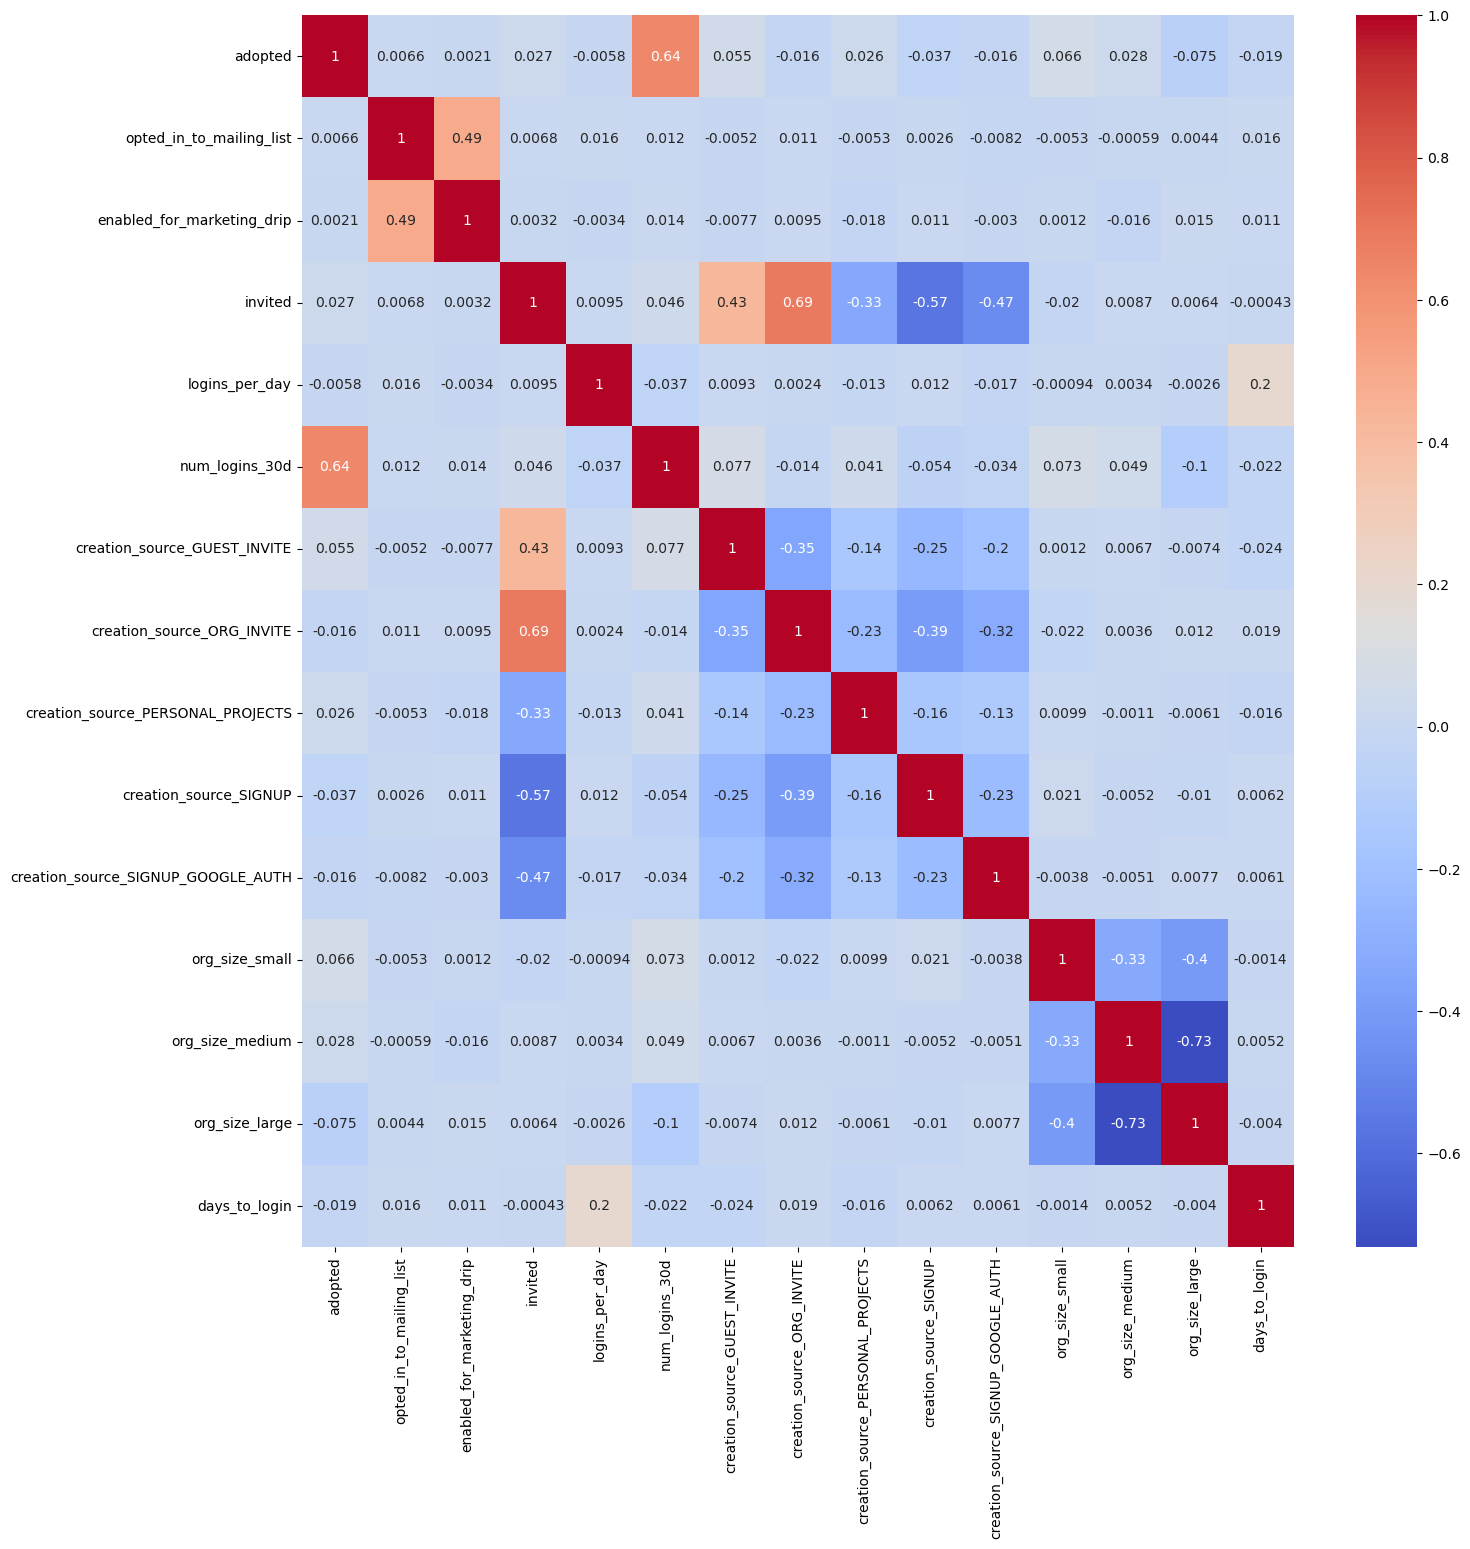

In [62]:
corr_matrix = cleaned_df[['adopted', 'opted_in_to_mailing_list', 'enabled_for_marketing_drip', 
       'invited', 'logins_per_day', 'num_logins_30d',
       'creation_source_GUEST_INVITE', 'creation_source_ORG_INVITE',
       'creation_source_PERSONAL_PROJECTS', 'creation_source_SIGNUP',
       'creation_source_SIGNUP_GOOGLE_AUTH', 'org_size_small', 'org_size_medium', 'org_size_large', 'days_to_login']].corr()

# Create the heatmap
plt.figure(figsize=(16,16))
sns.heatmap(corr_matrix, cmap='coolwarm', annot=True);

In [63]:
cleaned_df.drop(columns=['account_age', 'num_logins'], inplace=True)

In [64]:
cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8823 entries, 0 to 11999
Data columns (total 15 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   opted_in_to_mailing_list            8823 non-null   int64  
 1   enabled_for_marketing_drip          8823 non-null   int64  
 2   adopted                             8823 non-null   float64
 3   invited                             8823 non-null   int64  
 4   num_logins_30d                      8823 non-null   float64
 5   days_to_login                       8823 non-null   float64
 6   creation_source_GUEST_INVITE        8823 non-null   uint8  
 7   creation_source_ORG_INVITE          8823 non-null   uint8  
 8   creation_source_PERSONAL_PROJECTS   8823 non-null   uint8  
 9   creation_source_SIGNUP              8823 non-null   uint8  
 10  creation_source_SIGNUP_GOOGLE_AUTH  8823 non-null   uint8  
 11  org_size_small                      8823 n

In [65]:
X=cleaned_df.drop('adopted', axis=1)
y=cleaned_df['adopted']

### Split data

In [66]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)
X_train.head()

(7058, 14) (7058,)
(1765, 14) (1765,)


,opted_in_to_mailing_list,enabled_for_marketing_drip,invited,num_logins_30d,days_to_login,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH,org_size_small,org_size_medium,org_size_large,logins_per_day
4517,1,0,1,1.0,0.0,0,1,0,0,0,0,0,1,0.000000
5949,0,0,0,1.0,1.0,0,0,0,0,1,0,1,0,0.169202
1094,0,0,0,1.0,0.0,0,0,0,1,0,1,0,0,0.000000
10953,0,0,0,1.0,1.0,0,0,0,0,1,0,1,0,1.000000
604,0,0,0,1.0,2.0,0,0,0,0,1,0,1,0,0.727273


In [87]:
# We need to scale 'days_to_login' and 'logins_per_day' with StandardScaler
from sklearn.preprocessing import StandardScaler

# Create a scaler object
scaler = StandardScaler()

# Normalize the numerical columns
X_train['logins_per_day'] = scaler.fit_transform(X_train[['logins_per_day']])
X_test['logins_per_day'] = scaler.transform(X_test[['logins_per_day']])
X_train['num_logins_30d'] = scaler.fit_transform(X_train[['num_logins_30d']])
X_test['num_logins_30d'] = scaler.transform(X_test[['num_logins_30d']])
X_train['days_to_login'] = scaler.fit_transform(X_train[['days_to_login']])
X_test['days_to_login'] = scaler.transform(X_test[['days_to_login']])
X_train.head()

,opted_in_to_mailing_list,enabled_for_marketing_drip,invited,num_logins_30d,days_to_login,creation_source_GUEST_INVITE,creation_source_ORG_INVITE,creation_source_PERSONAL_PROJECTS,creation_source_SIGNUP,creation_source_SIGNUP_GOOGLE_AUTH,org_size_small,org_size_medium,org_size_large,logins_per_day
4517,1,0,1,-0.443969,-0.716490,0,1,0,0,0,0,0,1,-0.894359
5949,0,0,0,-0.443969,-0.004339,0,0,0,0,1,0,1,0,-0.435499
1094,0,0,0,-0.443969,-0.716490,0,0,0,1,0,1,0,0,-0.894359
10953,0,0,0,-0.443969,-0.004339,0,0,0,0,1,0,1,0,1.817555
604,0,0,0,-0.443969,0.707812,0,0,0,0,1,0,1,0,1.077942


### Oversample minority class with SMOTE

In [88]:
from imblearn.over_sampling import SMOTE

# create the SMOTE object
smote = SMOTE(random_state=42)

# fit and apply SMOTE to the data
X_resampled, y_resampled = smote.fit_resample(X_train, y_train)

# print the count of the two classes after resampling
print("Counts of label '0': {}".format(sum(y_resampled==0)))
print("Counts of label '1': {}".format(sum(y_resampled==1)))

Counts of label '0': 5794
Counts of label '1': 5794


### Modeling

We will use Random Forest model and Grid Search Cv for hyper parameters tuning to predict whether users become adopted.

Scoring metric will be F1 as harmonized mean of Precision and Recall.

In [69]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import f1_score, classification_report, accuracy_score, confusion_matrix
import time

In [89]:
#List of parameters for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [5, 10, 20, 30],
    'min_samples_split': [2, 4, 8],
    'criterion': ["gini", "entropy"]
}

# Define the scoring metric to use
scoring_metric = 'f1'

# Create the random forest classifier
rfc = RandomForestClassifier()

# Create the grid search object
grid_search = GridSearchCV(estimator=rfc, param_grid=param_grid, scoring=scoring_metric)

# Fit the grid search object to the data
grid_search.fit(X_resampled, y_resampled)

# Print out the best hyperparameters and the corresponding score
print("Best hyperparameters: ", grid_search.best_params_)
print("Best score: ", grid_search.best_score_)

# Print out the classification report for the best model
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
print(classification_report(y_test, y_pred))

Best hyperparameters:  {'criterion': 'entropy', 'max_depth': 30, 'min_samples_split': 4, 'n_estimators': 200}
Best score:  0.9587503023448752
              precision    recall  f1-score   support

         0.0       0.98      0.94      0.96      1427
         1.0       0.79      0.90      0.84       338

    accuracy                           0.94      1765
   macro avg       0.88      0.92      0.90      1765
weighted avg       0.94      0.94      0.94      1765



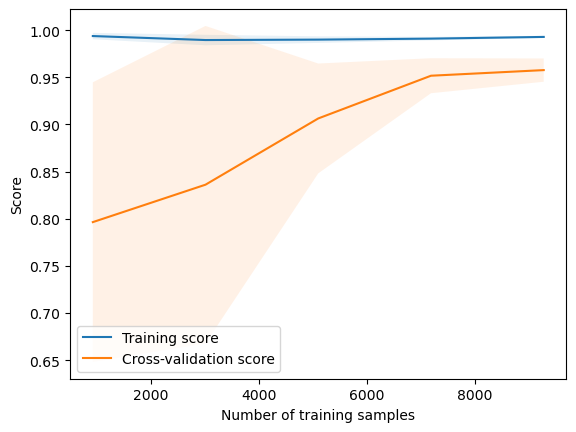

In [90]:
from sklearn.model_selection import learning_curve

# Define the random forest classifier with the best hyperparameters
rfc_best = RandomForestClassifier(n_estimators=grid_search.best_params_['n_estimators'],
                                   max_depth=grid_search.best_params_['max_depth'],
                                   min_samples_split=grid_search.best_params_['min_samples_split'],
                                   criterion=grid_search.best_params_['criterion'])

# Define the learning curve
train_sizes, train_scores, test_scores = learning_curve(rfc_best, X_resampled, y_resampled, cv=5)

# Calculate the mean and standard deviation of the training and test scores
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

# Plot the learning curve
plt.plot(train_sizes, train_mean, label='Training score')
plt.plot(train_sizes, test_mean, label='Cross-validation score')

# Add the standard deviation to the plot
plt.fill_between(train_sizes, train_mean - train_std, train_mean + train_std, alpha=0.1)
plt.fill_between(train_sizes, test_mean - test_std, test_mean + test_std, alpha=0.1)

# Add labels and legend to the plot
plt.xlabel('Number of training samples')
plt.ylabel('Score')
plt.legend(loc='best')

# Show the plot
plt.show()

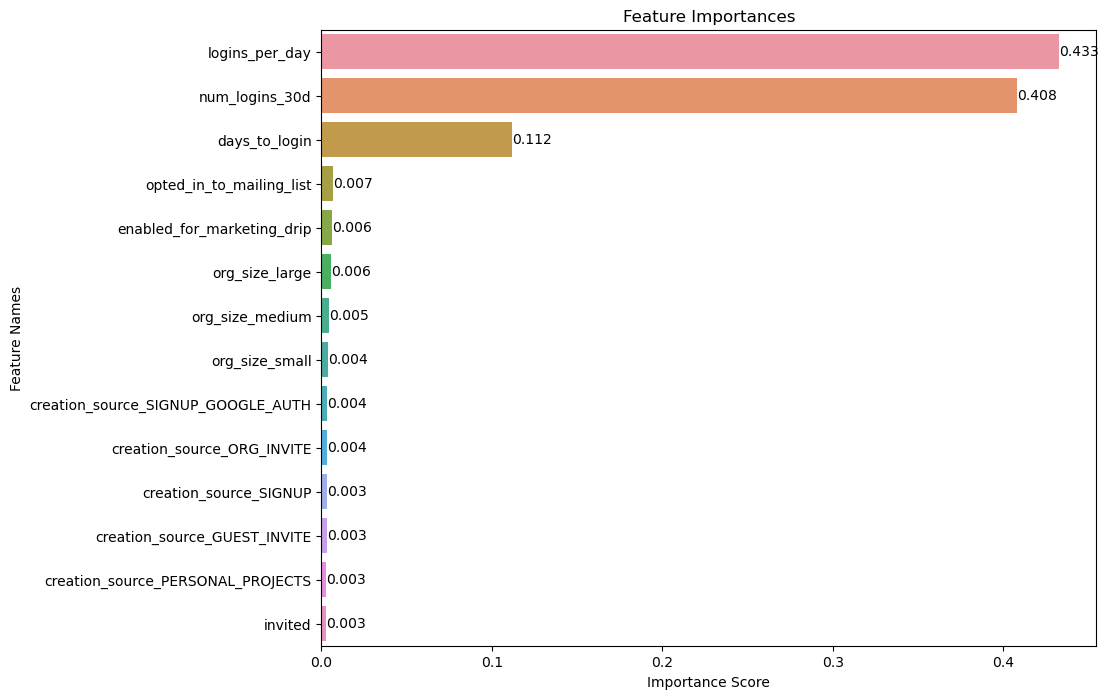

In [91]:
feature_importances = best_model.feature_importances_
feature_names = X_train.columns

# Create a dataframe of feature importances
fi_df = pd.DataFrame({'feature_names': feature_names, 'importance_scores': feature_importances})
fi_df = fi_df.sort_values(by='importance_scores', ascending=False).reset_index()

# Create a horizontal bar plot
plt.figure(figsize=(10, 8))
sns.barplot(x='importance_scores', y='feature_names', data=fi_df)

# Annotate the importance scores on the plot
for index, row in fi_df.iterrows():
    plt.text(row['importance_scores'], index, '{:.3f}'.format(row['importance_scores']), va='center')

plt.title('Feature Importances')
plt.xlabel('Importance Score')
plt.ylabel('Feature Names')
plt.show()